In [145]:
#Application of computer vision
#Image classification and Object Detection --> Google lens, google photos
#Banking--> deposit check online
#Agriculture --> yeild productions
#Autonomous cars --> Autopilot feature
#Retail --> Amazon go store (No employees) --> Just walk out technology
#Medical, warehouse, etc


In [146]:
# Image classification using CNN
#Feature extraction (convolution + ReLU, Pooling)
#classification
#Pooling to reduce size
# Types of pooling:-
#1 stride, 2 stride
#MAXPooling
#AVerage pooling
#

In [147]:
 #Disad of ANN:-
 #To much computation
 #sebsitive to location of an obj

In [1]:
#Image classification using CNN

In [46]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [47]:
(x_train, y_train) , (x_test, y_test) = datasets.cifar10.load_data()

In [48]:
x_train.shape

(50000, 32, 32, 3)

In [49]:
x_test.shape

(10000, 32, 32, 3)

In [50]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [51]:
classes = ['airoplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [52]:
def plot_sample(x, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

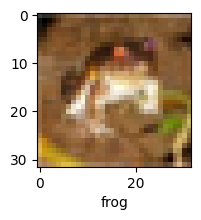

In [53]:
plot_sample(x_train, y_train, 0)

In [54]:
x_train = x_train/255
x_test = x_test/255

In [55]:
y_train.shape
x_train.shape

(50000, 32, 32, 3)

In [56]:
# y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer = 'SGD',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


ann.fit(x_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 163s 104ms/step - accuracy: 0.3011 - loss: 1.9354
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 177s 113ms/step - accuracy: 0.4191 - loss: 1.6450
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 175s 96ms/step - accuracy: 0.4538 - loss: 1.5512
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 195s 125ms/step - accuracy: 0.4751 - loss: 1.4950
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 186s 115ms/step - accuracy: 0.4937 - loss: 1.4352


In [57]:
ann.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.4863 - loss: 1.4485


[1.455604910850525, 0.4828000068664551]

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.48      0.55      1000
           1       0.51      0.73      0.60      1000
           2       0.45      0.20      0.28      1000
           3       0.34      0.46      0.39      1000
           4       0.47      0.33      0.39      1000
           5       0.54      0.16      0.25      1000
           6       0.49      0.60      0.54      1000
           7       0.41      0.69      0.52      1000
           8       0.55      0.69      0.61      1000
           9       0.56      0.48      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.46     10000
weighted avg       0.50      0.48      0.46     10000



In [59]:
#using cnn to improve performance
#softmax activation function --> normalize the probability

In [62]:
cnn = models.Sequential([
    #cnn layer --> feature extraction
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [66]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.3945 - loss: 1.6664
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.6192 - loss: 1.0932
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 61ms/step - accuracy: 0.6664 - loss: 0.9557
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7010 - loss: 0.8684
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.7274 - loss: 0.7897
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.7474 - loss: 0.7304
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7638 - loss: 0.6776
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7847 - loss: 0.6241
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7962 - loss: 0.5820
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.8151 - loss: 0.5385


In [67]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6946 - loss: 0.9351


[0.9362627863883972, 0.6937999725341797]

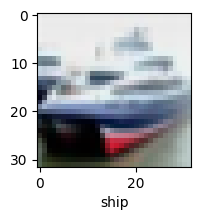

In [69]:
y_test = y_test.reshape(-1,)
plot_sample(x_test, y_test, 1)

In [70]:
y_pred = cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step


In [71]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [72]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

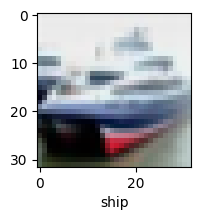

In [73]:
plot_sample(x_test, y_test, 1)

In [74]:
classes[y_classes[1]]

'ship'

In [12]:
#Convolution padding and stride
#Valid padding - No padding
#same convolution - pad such that output is same as input
#stride(x, y) = shifting of kernel at coordinate x and y


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [5]:

from pathlib import Path

data_dir = Path("datasets/flower_photos/flower_photos")  # Corrected path
roses_dir = data_dir / 'roses'
roses = list(roses_dir.glob('*'))

print(roses)  # Should show image file paths


[PosixPath('datasets/flower_photos/flower_photos/roses/1788484468_f73afa6c32_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/8723767157_c45bfd3ab6.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/17090993740_fcc8b60b81.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/4505921907_21c8002fde.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/17700322054_1c4fdaa034_m.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/218630974_5646dafc63_m.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/6108118824_5b0231a56d.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/8692040971_826614516f_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/14687731322_5613f76353.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/3829990289_c0c3821e4d_m.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/8516036987_8a06dfe1b5_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/15901230359_1819e9

In [6]:
# PIL.Image.open(str(roses[1]))

In [7]:
roses_dir = data_dir / 'roses'
daisy_dir = data_dir / 'daisy'
dandelion_dir = data_dir / 'dandelion'
sunflower_dir = data_dir / 'sunflowers'
tulips_dir = data_dir / 'tulips'
flowers_images_dict={
    'roses': list(roses_dir.glob('*')),
    'daisy': list(daisy_dir.glob('*')),
    'dandelion': list(dandelion_dir.glob('*')),
    'sunflowers':list(sunflower_dir.glob('*')),
    'tulips':list(tulips_dir.glob('*')),
}

In [8]:
flowers_label_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers':3,
    'tulips':4,
}

In [9]:
img = cv2.imread(flowers_images_dict['roses'][0])

In [10]:
img.shape


(241, 320, 3)

In [11]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [12]:
x,y = [],[]

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(image)
    resized_img = cv2.resize(img,(180,180))
    x.append(resized_img)
    y.append(flowers_label_dict[flower_name])

In [13]:
x = np.array(x)
y = np.array(y)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [15]:
len(x_train)

2752

In [16]:
len(x_test)

918

In [17]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [18]:
x_train_scaled[0]

array([[[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0

In [17]:
with tf.device('/GPU:0'):
  num_classes = 5
  model = Sequential([
    layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])

  model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

  model.fit(x_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.3608 - loss: 1.5320
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.6161 - loss: 1.0057
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.6924 - loss: 0.8150
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 116s 921ms/step - accuracy: 0.7625 - loss: 0.6409
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 80s 906ms/step - accuracy: 0.8352 - loss: 0.4431
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 77s 898ms/step - accuracy: 0.9158 - loss: 0.2451
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 82s 896ms/step - accuracy: 0.9558 - loss: 0.1299
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 84s 923ms/step - accuracy: 0.9817 - loss: 0.0768
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 84s 942ms/step - accuracy: 0.9903 - loss: 0.0453
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 79s 905ms/step - accuracy: 0.9820 - loss: 0.0550
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 82s 903ms/step - accuracy: 0.9973 - loss: 0.0172
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 82s 902m

In [18]:
model.evaluate(x_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.6826 - loss: 2.9121


[2.681548595428467, 0.6971677541732788]

In [19]:
predictions = model.predict(x_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step


array([[  5.697988  ,  26.522722  ,   2.0450075 , -27.338041  ,
         -9.588953  ],
       [ 36.814323  ,  -6.3393974 ,  -1.9263896 , -32.46894   ,
          5.072929  ],
       [  2.3677456 ,  -5.843346  ,  16.53098   ,  -6.3192353 ,
         -1.3735737 ],
       ...,
       [  0.38821727,  -7.5691514 ,   5.5256124 ,  16.680502  ,
         -2.826383  ],
       [  1.9903538 ,  -4.314582  ,   1.5972995 ,  -1.325873  ,
          4.661923  ],
       [ -8.98245   ,  -7.008525  ,  10.119195  ,  17.646915  ,
         -1.7555271 ]], dtype=float32)

In [20]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([9.0351021e-10, 1.0000000e+00, 2.3413355e-11, 4.0603886e-24,
       2.0744296e-16], dtype=float32)>

In [21]:
np.argmax(score)

np.int64(1)

In [22]:
y_test[0]

np.int64(1)

In [33]:
x_train[0].shape

(180, 180, 3)

In [19]:
data_augmentation = keras.Sequential([
    layers.RandomZoom(0.1),
    layers.RandomRotation(0.1),
    layers.RandomFlip('horizontal', input_shape=(180, 180, 3))

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


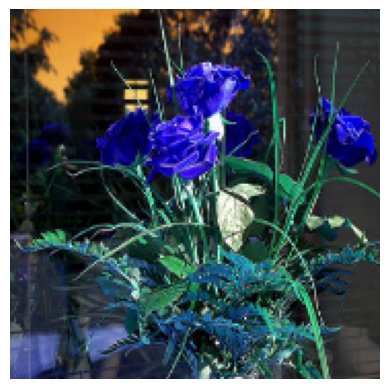

In [20]:
plt.axis('off')
plt.imshow(x[0])

In [21]:
data_augmentation(x)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[ 17.498985 ,  22.063154 ,  37.41757  ],
        [ 21.277035 ,  23.057732 ,  36.50072  ],
        [ 20.374012 ,  20.919106 ,  31.989517 ],
        ...,
        [  8.662449 ,  13.329337 ,  14.329337 ],
        [  8.328518 ,  13.259394 ,  14.18948  ],
        [  8.30585  ,  13.950532 ,  14.07158  ]],

       [[ 24.080973 ,  26.346777 ,  42.425858 ],
        [ 18.271914 ,  22.928822 ,  35.49513  ],
        [ 16.333405 ,  18.15708  ,  26.329231 ],
        ...,
        [  9.125987 ,  14.077496 ,  15.077496 ],
        [  8.783238 ,  13.651078 ,  14.651078 ],
        [  9.0128765,  13.709579 ,  14.758513 ]],

       [[ 25.14867  ,  25.45087  ,  37.669632 ],
        [ 22.087934 ,  24.236027 ,  31.518002 ],
        [ 19.149233 ,  22.621449 ,  25.563631 ],
        ...,
        [  9.222489 ,  13.821671 ,  14.821671 ],
        [  9.236675 ,  13.49485  ,  14.507283 ],
        [ 10.622403 ,  14.438755 ,  15.441376 ]],

       ...,

     

In [22]:
num_classes = 5
with tf.device('/GPU:0'):
  model = Sequential([
    data_augmentation,
    layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

  model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

  model.fit(x_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.2979 - loss: 1.6388
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.5770 - loss: 1.0531
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6212 - loss: 0.9811
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.6470 - loss: 0.8932
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.6588 - loss: 0.8759
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.6838 - loss: 0.7985
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.7118 - loss: 0.7579
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.7285 - loss: 0.7124
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.7153 - loss: 0.6867
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.7373 - loss: 0.6894


In [23]:
model.evaluate(x_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 499ms/step - accuracy: 0.7071 - loss: 0.7560


[0.731742262840271, 0.7156862616539001]